In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


### To test the model I wanted to create a notebook where I can dynamically load images from a URL or File Path to see how my model performs and do some analysis

In [2]:
# I had trouble saving the model so for now I will load both models separately
model = VGG16(include_top=False, weights='imagenet')
from keras.models import load_model
top_model = load_model('models/transfer_learning_model/top_model.h5')

## HELPER FUNCTION

In [18]:
def make_prediction_from_path(image_path, model, from_url=False):
    '''
    A function to make a prediction for a image, given its url or filepath
    
    Parameters
        ----------
        image_path : str
            The path to the image (filepath or url)
        from_url : boolean
            The a flag to set, True if path is a url, False if loaded from file system
        model : keras model
            the model to use for predictions
    '''
    try:
        model = model
        if from_url == True:
            # Download image
            response = requests.get(image_path, stream=True)
            img = Image.open(response.raw).convert("RGBA")
        else:
            img = Image.open(image_path).convert("RGBA")

        # Format
        new_image = Image.new('RGB', img.size, color=(255,255,255))
        new_image.paste(img, (0,0), img)
        done_formatting = new_image.resize((150,150))
        plt.imshow(done_formatting)

        ## IMPORTANT!!!! I have trained the model using the ImageDataGenerator which rescaled the image
        ## before feeding it to the model.
        ## We must now also rescale the picture before making a prediction
        img_reformatted = (1/255) * np.array(done_formatting).reshape((1, 150, 150, 3))
        print("Probability that shoe is in the picture:")
        pred1 = model.predict(img_reformatted)
        print(top_model.predict(pred1)[0][0])
        return img_reformatted
    except Exception as e:
        print("Something went wrong! Error Message:")
        print(e)

# Enter file path here:

Probability that shoe is in the picture:
2.7482902e-22


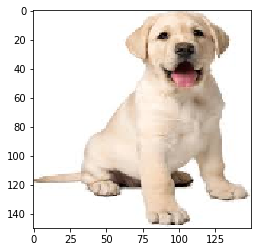

In [37]:
# Enter URL or filepath here:
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh3kUJU_pXXXqQpiBg_pw37-g0pkok3BJNePj5h0KhtKKVcfoV"
# Set flag "from_url" to False if you choose an image you want to load from file path
from_url = True
img_reformatted = make_prediction_from_path(image_path, model, from_url=from_url)

### Current insights:
Even the this model, wich makes better predictions on shoes that are not horizontal is still fooled at it mistakes the white background for an indicator that a shoe is in the picture.

I left some pictures in the test_images/ directory to test and demonstrate how i came to the conclusions mentioned above.